In [229]:
import math
import collections

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [230]:
df = pd.read_csv('original dataset.csv')

In [231]:
df.head(10)

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
5,147000,Toyota,Auris,Electric/Gasoline,Automatic,Used,6950,99.0,2011
6,91894,Renault,Scenic,Diesel,Manual,Used,6970,131.0,2011
7,127500,Opel,Zafira,Gasoline,Manual,Used,6972,116.0,2011
8,115000,Mazda,3,Gasoline,Automatic,Used,6980,150.0,2011
9,104,Ford,Transit,Diesel,Manual,Used,6990,86.0,2011


In [232]:
for col in df.columns:
  percent_missing = np.mean(df[col].isnull())
  print("{} - {}".format(col,round(percent_missing*100)))

mileage - 0
make - 0
model - 0
fuel - 0
gear - 0
offerType - 0
price - 0
hp - 0
year - 0


In [233]:
df.isnull().sum()

mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp            29
year           0
dtype: int64

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


In [235]:
df["hp"].describe()

count    46376.000000
mean       132.990987
std         75.449284
min          1.000000
25%         86.000000
50%        116.000000
75%        150.000000
max        850.000000
Name: hp, dtype: float64

In [236]:
avg_hp = df["hp"].mean()
avg_hp

132.99098671726756

In [237]:
df["hp"].replace(np.nan,avg_hp,inplace=True)
df["hp"].isnull().sum()

0

In [238]:
df.loc[df['model'].isna()]

,mileage,make,model,fuel,gear,offerType,price,hp,year
365,3500,Others,NaN,Electric,Manual,Used,5500,38.0,2018
2001,2900,Others,NaN,Electric,Automatic,Used,7900,5.0,2018
2009,60866,Opel,NaN,Gasoline,Manual,Used,12290,82.0,2019
2019,3550,Opel,NaN,Gasoline,Manual,Used,15800,110.0,2019
2496,3000,Audi,NaN,Electric,Automatic,Demonstration,172450,598.0,2021
...,...,...,...,...,...,...,...,...,...
46074,1,Others,NaN,Gasoline,Manual,Pre-registered,23990,150.0,2021
46102,1,Others,NaN,Gasoline,Manual,Pre-registered,23990,150.0,2021
46114,35,Kia,NaN,Electric/Gasoline,Automatic,Pre-registered,30440,141.0,2021
46120,35,Kia,NaN,Electric,Automatic,Pre-registered,32440,204.0,2021


In [239]:
df.dropna(subset = ["model"], axis = 0, inplace = True)
df.reset_index(drop = True, inplace = True)

In [240]:
df["gear"].value_counts()

Manual            30325
Automatic         15714
Semi-automatic       56
Name: gear, dtype: int64

In [241]:
df['gear'].replace(np.nan, "Manual", inplace = True)

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46262 entries, 0 to 46261
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46262 non-null  int64  
 1   make       46262 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46262 non-null  object 
 4   gear       46262 non-null  object 
 5   offerType  46262 non-null  object 
 6   price      46262 non-null  int64  
 7   hp         46262 non-null  float64
 8   year       46262 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


In [243]:
df["fuel"].unique()

array(['Diesel', 'Gasoline', 'Electric/Gasoline', '-/- (Fuel)',
       'Electric', 'Electric/Diesel', 'CNG', 'LPG', 'Others', 'Hydrogen',
       'Ethanol'], dtype=object)

In [244]:
df["fuel"].value_counts()

Gasoline             28796
Diesel               15220
Electric/Gasoline     1150
Electric               725
LPG                    126
CNG                    116
Electric/Diesel         53
Others                  47
-/- (Fuel)              26
Ethanol                  2
Hydrogen                 1
Name: fuel, dtype: int64

In [245]:
df["fuel"].replace("-/- (Fuel)","Gasoline",inplace=True)

In [246]:
df.loc[df['hp'] == 1]

,mileage,make,model,fuel,gear,offerType,price,hp,year
9091,167000,Renault,Megane,Diesel,Manual,Used,5450,1.0,2012
36106,302000,Toyota,Prius+,Electric/Gasoline,Manual,Used,7985,1.0,2013


In [247]:
df[['hp']].loc[(df['model'] == 'Megane') & (df['year'] == 2012)].mean()

hp    110.609756
dtype: float64

In [248]:
df[['hp']].loc[(df['model'] == 'Prius') & (df['year'] == 2013)].mean()

hp    108.25
dtype: float64

In [249]:
df['hp'].replace(1, 110, inplace = True)

In [250]:
df["hp"].describe()

count    46262.000000
mean       132.888608
std         75.011359
min          5.000000
25%         86.000000
50%        116.000000
75%        150.000000
max        850.000000
Name: hp, dtype: float64

In [251]:
df.loc[(df['hp']==850) | (df['hp']==5)]

,mileage,make,model,fuel,gear,offerType,price,hp,year
1984,21800,Microcar,Due,Diesel,Automatic,Used,8490,5.0,2017
7070,18137,Ligier,JS 50,Diesel,Automatic,Used,9950,5.0,2016
12206,49670,Microcar,M.Go,Diesel,Automatic,Used,4950,5.0,2011
18499,51355,Renault,Twizy,Electric,Automatic,Used,4990,5.0,2017
25798,15766,Microcar,M8,Diesel,Manual,Used,3900,5.0,2014
29926,10,Hyundai,Kona,Electric/Gasoline,Automatic,Pre-registered,29490,5.0,2020
30481,24000,Microcar,M.Go,Diesel,Automatic,Used,8200,5.0,2016
34215,17413,Microcar,M.Go,Diesel,Automatic,Used,7990,5.0,2011
37760,1200,Aixam,City,Electric,Automatic,Used,8500,5.0,2014
37803,57800,Ligier,JS 50,Diesel,Automatic,Used,8600,5.0,2014


In [252]:
df.isnull().sum()

mileage      0
make         0
model        0
fuel         0
gear         0
offerType    0
price        0
hp           0
year         0
dtype: int64

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46262 entries, 0 to 46261
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46262 non-null  int64  
 1   make       46262 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46262 non-null  object 
 4   gear       46262 non-null  object 
 5   offerType  46262 non-null  object 
 6   price      46262 non-null  int64  
 7   hp         46262 non-null  float64
 8   year       46262 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


Text(0.5, 1.0, 'Horsepower bins')

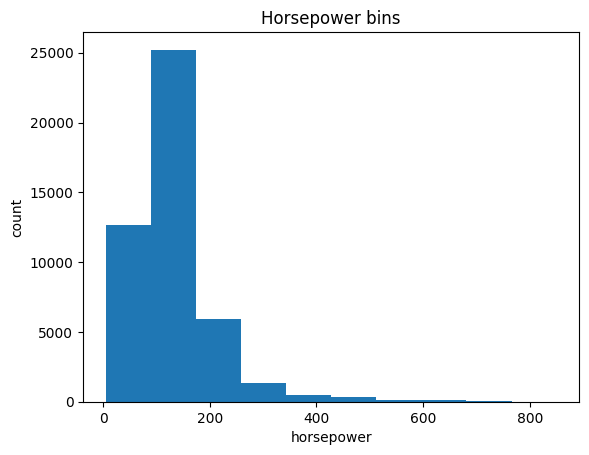

In [254]:
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df['hp'])
plt.pyplot.xlabel('horsepower')
plt.pyplot.ylabel('count')
plt.pyplot.title('Horsepower bins')

In [255]:
groups = np.array([1,100,200,400,850])
group_name = ['5-100 hp','100-200 hp','200-400 hp','400+hp']
df["hp-bin"] = pd.cut(df["hp"],groups,labels=group_name,include_lowest = True)
df[['hp', 'hp-bin']].head(10)

,hp,hp-bin
0,116.0,100-200 hp
1,122.0,100-200 hp
2,160.0,100-200 hp
3,110.0,100-200 hp
4,156.0,100-200 hp
5,99.0,5-100 hp
6,131.0,100-200 hp
7,116.0,100-200 hp
8,150.0,100-200 hp
9,86.0,5-100 hp


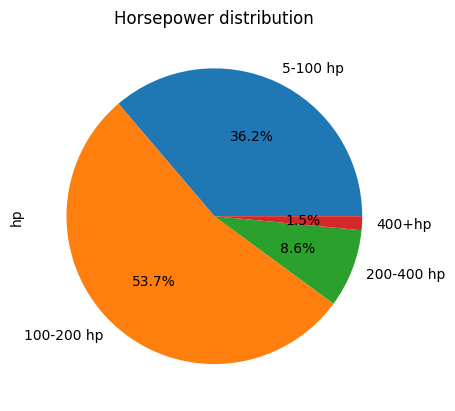

In [256]:
pie1 = df.groupby(["hp-bin"]).count()
plot = pie1.plot.pie(y = 'hp',title="Horsepower distribution",legend=False,autopct='%1.1f%%')

In [257]:
price_groups = np.array([1., 10000., 20000., 50000., 2000000.])
group_price_name = ['< 10000€', '10000-20000€', '20000-50000€', '50000€ +',]
df['price-bin'] = pd.cut(df['price'], price_groups, labels = group_price_name, include_lowest = True)
df[['price', 'price-bin']].head(10)

,price,price-bin
0,6800,< 10000€
1,6877,< 10000€
2,6900,< 10000€
3,6950,< 10000€
4,6950,< 10000€
5,6950,< 10000€
6,6970,< 10000€
7,6972,< 10000€
8,6980,< 10000€
9,6990,< 10000€


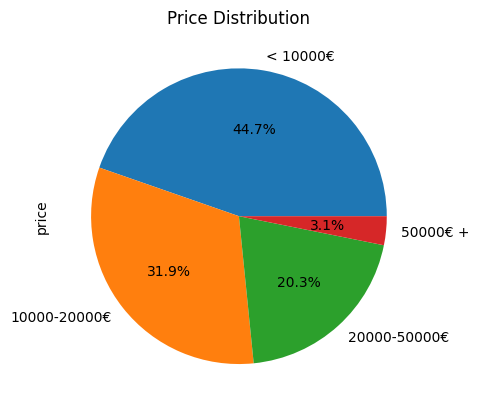

In [258]:
pie2 = df.groupby(['price-bin']).count()
plot2 = pie2.plot.pie(y="price",title="Price Distribution",legend=False,autopct='%1.1f%%')

In [259]:
df['price-bin'].value_counts()

< 10000€        20664
10000-20000€    14770
20000-50000€     9371
50000€ +         1457
Name: price-bin, dtype: int64

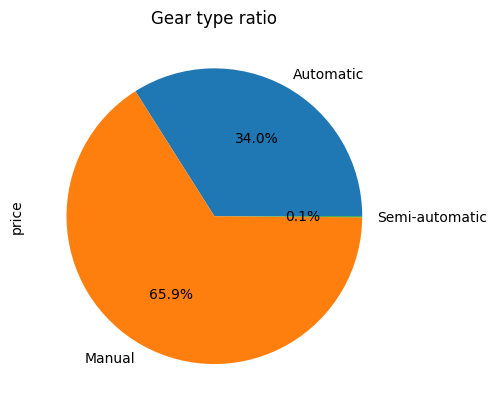

In [260]:
pie_gear = df.groupby(['gear']).count()
plot_gear = pie_gear.plot.pie(y = 'price', title="Gear type ratio", legend=False ,autopct='%1.1f%%',)

In [261]:
df['gear'].value_counts()

Manual            30492
Automatic         15714
Semi-automatic       56
Name: gear, dtype: int64

In [262]:
df['fuel'].value_counts()

Gasoline             28822
Diesel               15220
Electric/Gasoline     1150
Electric               725
LPG                    126
CNG                    116
Electric/Diesel         53
Others                  47
Ethanol                  2
Hydrogen                 1
Name: fuel, dtype: int64

In [263]:
df['fuel_group'] = df['fuel']
df['fuel_group'].replace({'LPG': 'Gas', 'CNG': 'Gas', 'Ethanol': 'Gas', 'Hydrogen': 'Gas','Others':'Gasoline','Electric/Gasoline':'Hybrid','Electric/Diesel':'Hybrid'}, inplace=True)
df['fuel_group'].value_counts()

Gasoline    28869
Diesel      15220
Hybrid       1203
Electric      725
Gas           245
Name: fuel_group, dtype: int64

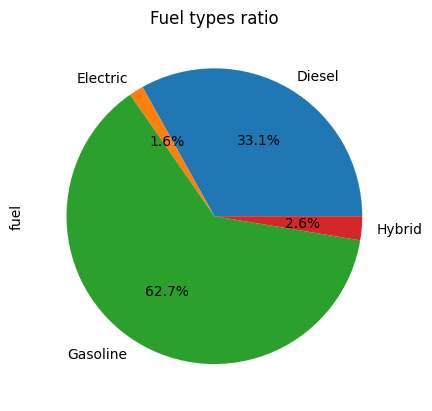

In [264]:
pf = df.loc[df['fuel_group'] != 'Gas']
pie_fuel = pf.groupby(['fuel_group']).count()
plot = pie_fuel.plot.pie(y = 'fuel', title="Fuel types ratio", legend=False,
                   autopct='%1.1f%%')

In [265]:
df['offerType'].value_counts()

Used              39997
Pre-registered     2773
Demonstration      2360
Employee's car     1119
New                  13
Name: offerType, dtype: int64

In [266]:
df['new/used'] = df['offerType']
df['new/used'].replace({'Pre-registered':'New','Demonstration':'New',"Employee's car":'Used'}, inplace = True)
df['new/used'].value_counts()

Used    41116
New      5146
Name: new/used, dtype: int64

<BarContainer object of 2 artists>

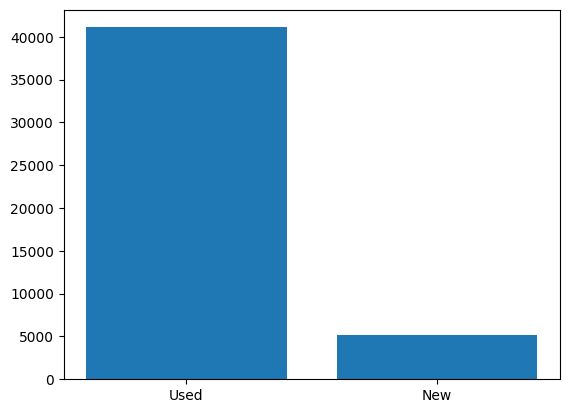

In [267]:
pyplot.bar(df['new/used'].unique(), df['new/used'].value_counts())

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46262 entries, 0 to 46261
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   mileage     46262 non-null  int64   
 1   make        46262 non-null  object  
 2   model       46262 non-null  object  
 3   fuel        46262 non-null  object  
 4   gear        46262 non-null  object  
 5   offerType   46262 non-null  object  
 6   price       46262 non-null  int64   
 7   hp          46262 non-null  float64 
 8   year        46262 non-null  int64   
 9   hp-bin      46262 non-null  category
 10  price-bin   46262 non-null  category
 11  fuel_group  46262 non-null  object  
 12  new/used    46262 non-null  object  
dtypes: category(2), float64(1), int64(3), object(7)
memory usage: 4.0+ MB


In [269]:
df[["year"]] = df[["year"]].astype('object')

In [270]:
df.corr()

<ipython-input-270-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mileage,price,hp
mileage,1.000000,-0.302906,-0.014284
price,-0.302906,1.000000,0.746544
hp,-0.014284,0.746544,1.000000


In [271]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['price'], df['mileage'])
print('The Pearson correlation between price and mileage is', pearson_coef, 'p-value is', p_value)

The Pearson correlation between price and mileage is -0.30290556073430497 p-value is 0.0


In [272]:
corr_mat = df.corr()
corr_pairs = corr_mat.unstack()
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

<ipython-input-272-9bd0d83c3717>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr()


mileage  price     -0.302906
price    mileage   -0.302906
mileage  hp        -0.014284
hp       mileage   -0.014284
price    hp         0.746544
hp       price      0.746544
mileage  mileage    1.000000
price    price      1.000000
hp       hp         1.000000
dtype: float64

<ipython-input-273-4d7b3d05a344>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method = 'pearson')


<Axes: >

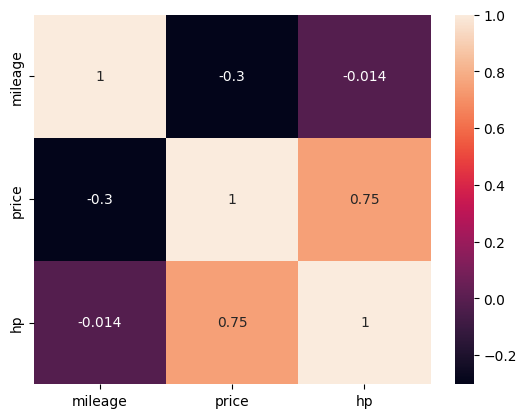

In [273]:
correlation_matrix = df.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)

In [274]:
pearson_coef2, p_value2 = stats.pearsonr(df['price'], df['year'])
print('The Pearson correlation between price and year is', pearson_coef2, 'p-value is', p_value2)

The Pearson correlation between price and year is 0.40595583237406596 p-value is 0.0


In [275]:
gear_test = df[['gear', 'model', 'price']]
pricegear_test = df[['gear', 'price']].groupby(['gear'])
pricegear_test.head(5)

,gear,price
0,Manual,6800
1,Manual,6877
2,Manual,6900
3,Manual,6950
4,Manual,6950
5,Automatic,6950
8,Automatic,6980
10,Automatic,6990
12,Automatic,6990
20,Automatic,7850


In [276]:
gear_test

,gear,model,price
0,Manual,316,6800
1,Manual,Golf,6877
2,Manual,Exeo,6900
3,Manual,Megane,6950
4,Manual,308,6950
...,...,...,...
46257,Manual,500,12990
46258,Manual,500,12990
46259,Manual,500,12990
46260,Manual,500,12990


In [277]:
f_val, p_val = stats.f_oneway(pricegear_test.get_group('Manual')['price'], pricegear_test.get_group('Automatic')['price'])
print('Anova results: f = ', f_val, ', p = ', p_val)

Anova results: f =  10635.900231397447 , p =  0.0


In [278]:
f_val, p_val = stats.f_oneway(pricegear_test.get_group('Automatic')['price'], pricegear_test.get_group('Semi-automatic')['price'])

print('Anova results: f = ', f_val, ', p = ', p_val)

Anova results: f =  27.278758841863247 , p =  1.7837561625754947e-07


In [279]:
f_val, p_val = stats.f_oneway(pricegear_test.get_group('Manual')['price'], pricegear_test.get_group('Semi-automatic')['price'])

print('Anova results: f = ', f_val, ', p = ', p_val)

Anova results: f =  5.703817139510052 , p =  0.016934095527232778


(0.0, 400000.0)

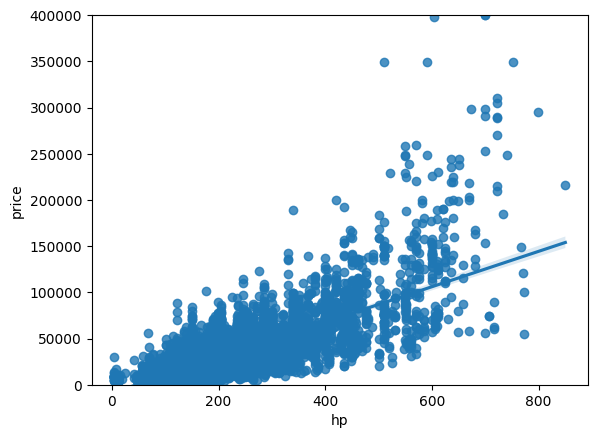

In [285]:
import matplotlib.pyplot as plt
sns.regplot(x='hp', y = 'price', data = df)
plt.ylim(0,400000)

(350.0, 3221.0)

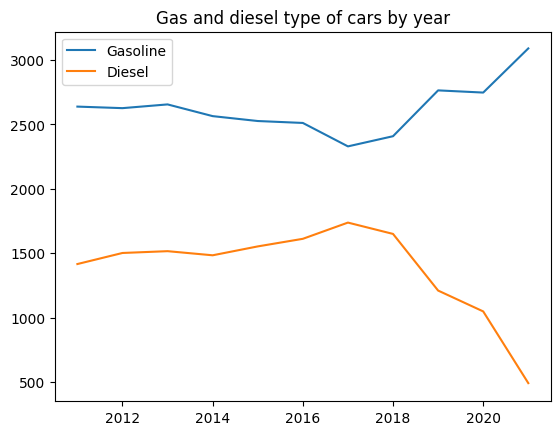

In [287]:
fuel_count = df.groupby(['year', 'fuel_group'], as_index = False).count()
gasoline = fuel_count[(fuel_count['fuel_group'] == 'Gasoline')]
diesel = fuel_count[(fuel_count['fuel_group'] == 'Diesel')]
hybrid = fuel_count[(fuel_count['fuel_group'] == 'Hybrid')]
gas = fuel_count[(fuel_count['fuel_group'] == 'Gas')]
electric = fuel_count[(fuel_count['fuel_group'] == 'Electric')]

plt.plot(gasoline['year'], gasoline['make'], label = 'Gasoline')
plt.plot(diesel['year'], diesel['make'], label = 'Diesel')
plt.legend()
plt.title('Gas and diesel type of cars by year')
plt.ylim(350,)

(0.0, 435.55)

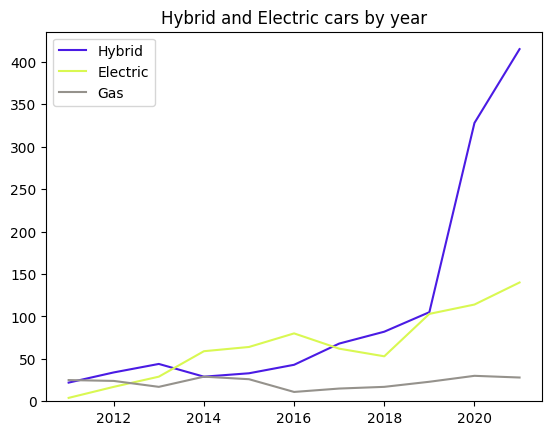

In [288]:
plt.plot(hybrid['year'], hybrid['make'], label = 'Hybrid', color = '#4a1be4')
plt.plot(electric['year'], electric['make'], label = 'Electric', color = '#d9f852')
plt.plot(gas['year'], gas['make'], label = 'Gas', color = '#95928c')
plt.legend()
plt.title('Hybrid and Electric cars by year')
plt.ylim(0,)

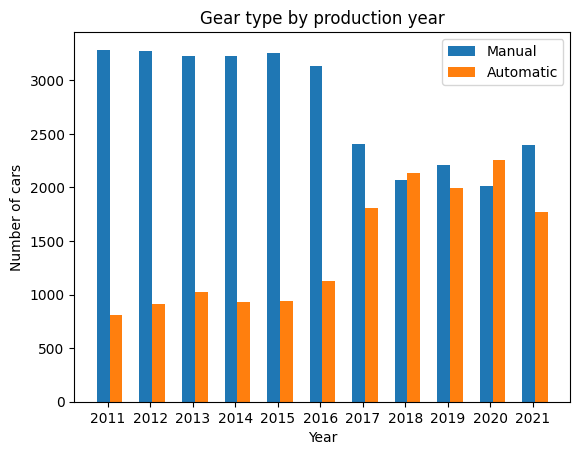

In [289]:
gear_count = df.groupby(['year','gear'],as_index=False).count()
X = gear_count['year'].unique()
manual = gear_count[(gear_count['gear'] == 'Manual')]
automatic = gear_count[(gear_count['gear'] == 'Automatic')]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.1, manual['make'], 0.3, label = 'Manual')
plt.bar(X_axis + 0.2, automatic['make'], 0.3, label = 'Automatic')
plt.xticks(X_axis, X)
plt.xlabel("Year")
plt.ylabel("Number of cars")
plt.title("Gear type by production year")
plt.legend()
plt.show()

(0.0, 456.75)

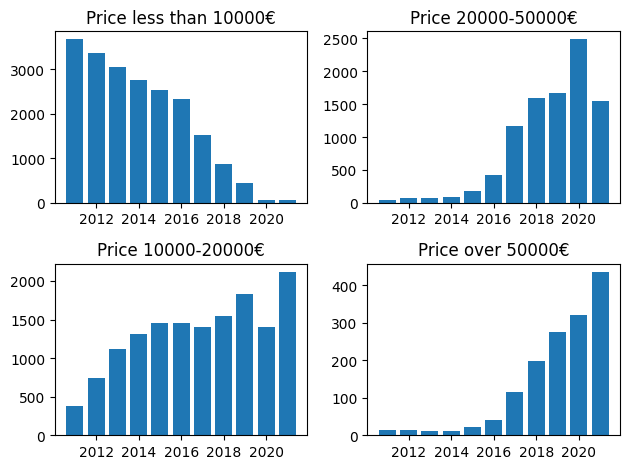

In [291]:
price_bin_year = df.groupby(['price-bin', 'year'], as_index = False).count()
bin1 = price_bin_year[(price_bin_year['price-bin'] == '< 10000€')]
bin2 = price_bin_year[(price_bin_year['price-bin'] == '10000-20000€')]
bin3 = price_bin_year[(price_bin_year['price-bin'] == '20000-50000€')]
bin4 = price_bin_year[(price_bin_year['price-bin'] == '50000€ +')]

fig, axs = plt.subplots(2, 2)
axs[0, 0].bar(bin1['year'], bin1['make'], label = '< 10000€')
axs[0, 0].set_title('Price less than 10000€')
axs[1, 0].bar(bin2['year'], bin2['make'], label = '10000-20000€')
axs[1, 0].set_title('Price 10000-20000€')
axs[1, 0].sharex(axs[0, 0])
axs[0, 1].bar(bin3['year'], bin3['make'], label = '20000-50000€')
axs[0, 1].set_title('Price 20000-50000€')
axs[1, 1].bar(bin4['year'], bin4['make'], label = '50000€ +')
axs[1, 1].set_title('Price over 50000€')
fig.tight_layout()
plt.ylim(0,)

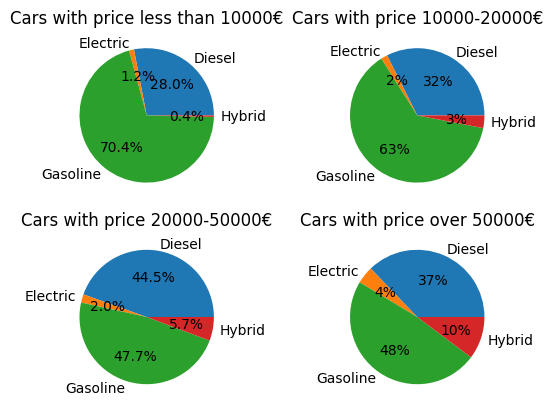

In [292]:
fuel_ng = df.loc[df['fuel_group'] != 'Gas']
price_bin_fuel = fuel_ng.groupby(['price-bin', 'fuel_group'], as_index = False).count()
bin12 = price_bin_fuel[(price_bin_fuel['price-bin'] == '< 10000€')]
bin22 = price_bin_fuel[(price_bin_fuel['price-bin'] == '10000-20000€')]
bin32 = price_bin_fuel[(price_bin_fuel['price-bin'] == '20000-50000€')]
bin42 = price_bin_fuel[(price_bin_fuel['price-bin'] == '50000€ +')]

fig1, axs1 = plt.subplots(2, 2)
axs1[0, 0].pie(bin12['make'], labels = bin12['fuel_group'], autopct='%1.1f%%')
axs1[0, 0].set_title('Cars with price less than 10000€')
axs1[0, 1].pie(bin22['make'], labels=bin22['fuel_group'], autopct='%.0f%%')
axs1[0, 1].set_title('Cars with price 10000-20000€')
axs1[1, 0].pie(bin32['make'], labels=bin32['fuel_group'], autopct='%1.1f%%')
axs1[1, 0].set_title('Cars with price 20000-50000€')
axs1[1, 1].pie(bin42['make'], labels=bin42['fuel_group'], autopct='%.0f%%')
axs1[1, 1].set_title('Cars with price over 50000€')
plt.show()

(0.0, 15147.55)

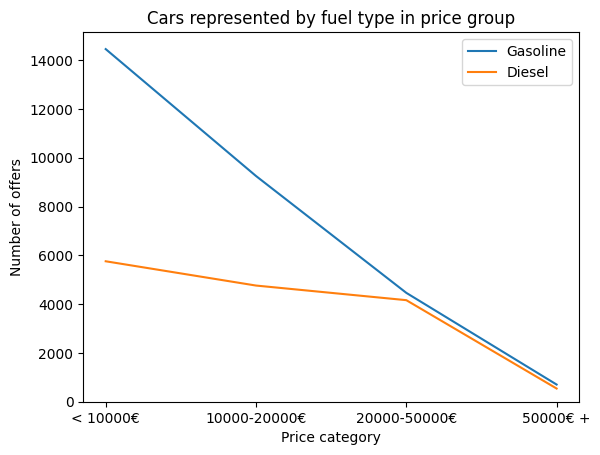

In [293]:
fuel_count1 = df.groupby(['price-bin', 'fuel_group'], as_index = False).count()
gasoline = fuel_count1[(fuel_count1['fuel_group'] == 'Gasoline')]
diesel = fuel_count1[(fuel_count1['fuel_group'] == 'Diesel')]
hybrid = fuel_count1[(fuel_count1['fuel_group'] == 'Hybrid')]
gas = fuel_count1[(fuel_count1['fuel_group'] == 'Gas')]
electric = fuel_count1[(fuel_count1['fuel_group'] == 'Electric')]

plt.plot(gasoline['price-bin'], gasoline['make'], label = 'Gasoline')
plt.plot(diesel['price-bin'], diesel['make'], label = 'Diesel')
plt.legend()
plt.title('Cars represented by fuel type in price group')
plt.ylabel('Number of offers')
plt.xlabel('Price category')
plt.ylim(0,)

(0.0, 560.6)

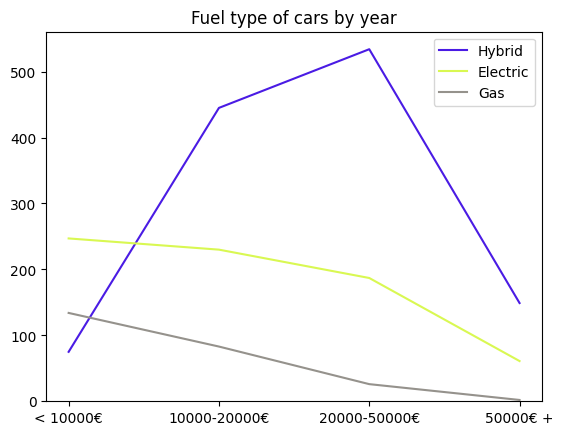

In [294]:
plt.plot(hybrid['price-bin'], hybrid['make'], label = 'Hybrid', color = '#4a1be4')
plt.plot(electric['price-bin'], electric['make'], label = 'Electric', color = '#d9f852')
plt.plot(gas['price-bin'], gas['make'], label = 'Gas', color = '#95928c')
plt.legend()
plt.title('Fuel type of cars by year')
plt.ylim(0,)

(0.0, 1479.45)

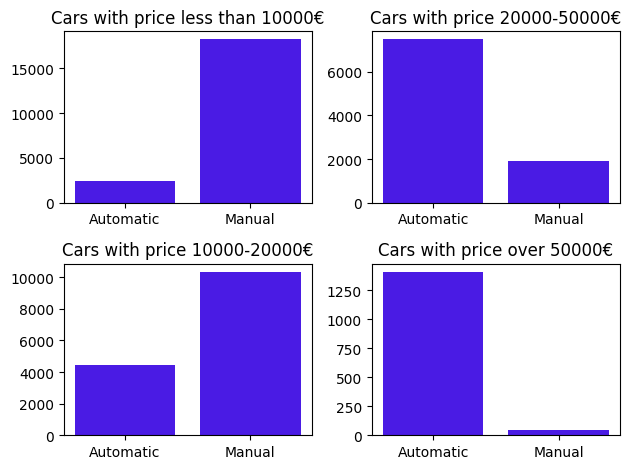

In [295]:
cars_ma = df.loc[df['gear'] != 'Semi-automatic']
price_bin_year1 = cars_ma.groupby(['price-bin', 'gear'], as_index = False).count()
bin11 = price_bin_year1[(price_bin_year1['price-bin'] == '< 10000€')]
bin21 = price_bin_year1[(price_bin_year1['price-bin'] == '10000-20000€')]
bin31 = price_bin_year1[(price_bin_year1['price-bin'] == '20000-50000€')]
bin41 = price_bin_year1[(price_bin_year1['price-bin'] == '50000€ +')]

fig, axs = plt.subplots(2, 2)
axs[0, 0].bar(bin11['gear'], bin11['make'], label = '< 10000€')
axs[0, 0].set_title('Cars with price less than 10000€')
axs[1, 0].bar(bin21['gear'], bin21['make'], label = '10000-20000€')
axs[1, 0].set_title('Cars with price 10000-20000€')
axs[1, 0].sharex(axs[0, 0])
axs[0, 1].bar(bin31['gear'], bin31['make'], label = '20000-50000€')
axs[0, 1].set_title('Cars with price 20000-50000€')
axs[1, 1].bar(bin41['gear'], bin41['make'], label = '50000€ +')
axs[1, 1].set_title('Cars with price over 50000€')
fig.tight_layout()
plt.ylim(0,)

(0.0, 50.4)

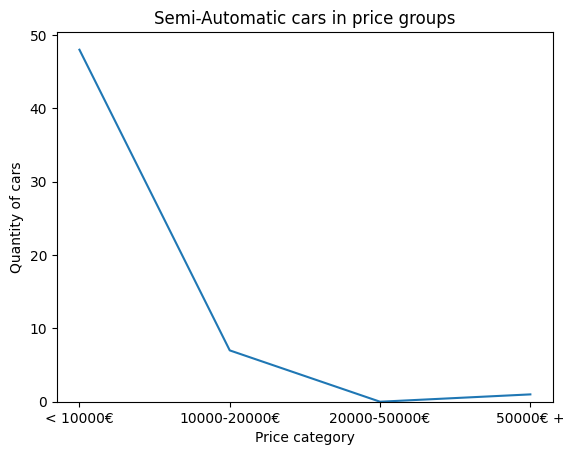

In [296]:
cars_sa = df.loc[df['gear'] == 'Semi-automatic']
price_bin_year12 = cars_sa.groupby(['price-bin', 'gear'], as_index = False).count()

pyplot.plot(price_bin_year12['price-bin'], price_bin_year12['make'])

pyplot.xlabel('Price category')
pyplot.ylabel('Quantity of cars')
pyplot.title('Semi-Automatic cars in price groups')
plt.ylim(0,)

In [297]:
df['model_available'] = df['model'].map(df['model'].value_counts())
df['make_count'] = df['make'].map(df['make'].value_counts())
df.head(10)

,mileage,make,model,fuel,gear,offerType,price,hp,year,hp-bin,price-bin,fuel_group,new/used,model_available,make_count
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011,100-200 hp,< 10000€,Diesel,Used,49,2400
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011,100-200 hp,< 10000€,Gasoline,Used,1492,6921
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011,100-200 hp,< 10000€,Gasoline,Used,15,1924
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011,100-200 hp,< 10000€,Gasoline,Used,389,2828
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011,100-200 hp,< 10000€,Gasoline,Used,179,1232
5,147000,Toyota,Auris,Electric/Gasoline,Automatic,Used,6950,99.0,2011,5-100 hp,< 10000€,Hybrid,Used,182,1275
6,91894,Renault,Scenic,Diesel,Manual,Used,6970,131.0,2011,100-200 hp,< 10000€,Diesel,Used,142,2828
7,127500,Opel,Zafira,Gasoline,Manual,Used,6972,116.0,2011,100-200 hp,< 10000€,Gasoline,Used,210,4801
8,115000,Mazda,3,Gasoline,Automatic,Used,6980,150.0,2011,100-200 hp,< 10000€,Gasoline,Used,148,714
9,104,Ford,Transit,Diesel,Manual,Used,6990,86.0,2011,5-100 hp,< 10000€,Diesel,Used,105,4441


In [298]:
model_avg = df[['make', 'model','price', 'model_available', 'mileage']]
model_avg = model_avg.groupby(['make', 'model'], as_index = False).mean()
model_avg = model_avg.sort_values(by = 'model_available', ascending = False)
top10_models = model_avg.head(10)
top10_models.reset_index(drop = True, inplace = True)
top10_models

,make,model,price,model_available,mileage
0,Volkswagen,Golf,13540.550268,1492.0,91738.143432
1,Opel,Corsa,8959.626425,1491.0,55012.012743
2,Ford,Fiesta,9864.217223,1289.0,52437.594259
3,Opel,Astra,9574.460957,1191.0,101118.967254
4,Ford,Focus,12428.889340,985.0,83752.351269
5,Volkswagen,up!,7622.245503,945.0,55040.931217
6,Skoda,Fabia,10170.062159,917.0,55746.147219
7,Volkswagen,Polo,10053.581187,893.0,68183.679731
8,smart,forTwo,7878.895172,725.0,55304.531034
9,Fiat,500,11022.250765,666.0,25588.981651


In [299]:
rare_models = df.loc[df['model_available'] == 1]
rare_models[['make', 'model', 'price', 'hp', 'mileage']]

,make,model,price,hp,mileage
762,Mercedes-Benz,GLS 500,86885,455.0,2267
3401,Chrysler,Grand Voyager,9999,287.0,145000
3630,Volkswagen,Cross Golf,9900,160.0,87000
4567,Mercedes-Benz,SLC 200,36950,184.0,44000
5080,Dodge,Nitro,9700,260.0,107130
...,...,...,...,...,...
45603,Mercedes-Benz,S 260,134999,330.0,15
45985,Kia,e-Niro,37480,204.0,35
46102,Alpine,A110,74990,292.0,3112
46183,BMW,iX3,58000,286.0,45


In [300]:
make_avg = df[['make', 'model','price', 'make_count', 'mileage']]
make_avg = make_avg.groupby(['make'], as_index = False).mean()
make_avg = make_avg.sort_values(by = 'make_count', ascending = False)
top10_make = make_avg.head(10)
top10_make.reset_index(drop = True, inplace = True)
top10_make

<ipython-input-300-32c5ee137e9f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  make_avg = make_avg.groupby(['make'], as_index = False).mean()


,make,price,make_count,mileage
0,Volkswagen,16060.086693,6921.0,80881.041035
1,Opel,10428.031660,4801.0,78416.944803
2,Ford,13793.374465,4441.0,69201.887188
3,Skoda,13715.193952,2877.0,70644.231839
4,Renault,11287.898161,2828.0,57111.046676
5,Audi,30000.226035,2681.0,76796.273405
6,BMW,23431.069583,2400.0,97489.545417
7,Mercedes-Benz,28379.921176,2347.0,96164.900298
8,SEAT,12847.433472,1924.0,66158.880977
9,Hyundai,12852.694592,1886.0,52792.598091


In [301]:
rare10_make = df.loc[df['make_count'] == 1]
rare10_make.reset_index(drop = True, inplace = True)
rare10_make[['make', 'model', 'price', 'hp', 'mileage', 'make_count']]

,make,model,price,hp,mileage,make_count
0,Zhidou,D2S,12500,24.000000,3000,1
1,Tazzari,EV Zero Classic,6500,20.000000,38000,1
2,Trucks-Lkw,Ford,8200,131.000000,312000,1
3,Brilliance,BS4,1500,101.000000,100524,1
4,FISKER,Karma,69900,408.000000,7500,1
5,Others,Landwind,1850,97.000000,1,1
6,Isuzu,D-Max,16900,163.000000,56000,1
7,Caravans-Wohnm,Adria,24500,132.990987,2000,1
8,Alpine,A110,74990,292.000000,3112,1


In [302]:
cars_sorted = df.sort_values(by = 'price', ascending = False)
top10_expensive = cars_sorted.head(10)
top10_expensive.reset_index(drop = True, inplace = True)
top10_expensive[['make', 'model', 'price', 'hp', 'mileage']]

,make,model,price,hp,mileage
0,Ferrari,F12,1199900,775.0,431
1,Mercedes-Benz,S 650,717078,630.0,90
2,Maybach,Pullman,717078,630.0,90
3,Maybach,Pullman,499800,530.0,3400
4,Mercedes-Benz,SLS,465000,591.0,350
5,Lamborghini,Aventador,449900,770.0,3600
6,Ferrari,812,439900,799.0,6500
7,Lamborghini,Aventador,439900,770.0,14090
8,Lamborghini,Aventador,399999,700.0,1200
9,Porsche,991,399911,700.0,4624


In [303]:
top10_cheapest = cars_sorted.tail(10)
top10_cheapest = top10_cheapest.sort_values(by = 'price', ascending = True)
top10_cheapest.reset_index(drop = True, inplace = True)
top10_cheapest[['make', 'model', 'price', 'hp', 'mileage']]

,make,model,price,hp,mileage
0,Citroen,C1,1100,68.0,204000
1,Lada,Priora,1190,98.0,100611
2,Toyota,Aygo,1250,68.0,153000
3,Peugeot,206,1299,68.0,222000
4,Opel,Corsa,1300,69.0,133000
5,Volkswagen,Touran,1396,140.0,233567
6,Brilliance,BS4,1500,101.0,100524
7,SEAT,Ibiza,1500,69.0,170000
8,smart,forTwo,1500,54.0,140000
9,Fiat,Panda,1500,69.0,157000


In [304]:
cars_sorted_hp = df.sort_values(by = 'hp', ascending = False)
top10hp = cars_sorted_hp.head(10)
top10hp = top10hp.reset_index()
top10hp[['make', 'model', 'price', 'hp', 'mileage']]

,make,model,price,hp,mileage
0,Mercedes-Benz,G 63 AMG,216619,850.0,9234
1,Audi,R8,295000,799.0,11000
2,Ferrari,812,439900,799.0,6500
3,Ferrari,F12,1199900,775.0,431
4,Tesla,Model S,54450,772.0,71099
5,Tesla,Model X,99999,772.0,63205
6,Ford,Mustang,121000,771.0,50
7,Lamborghini,Aventador,439900,770.0,14090
8,Lamborghini,Aventador,449900,770.0,3600
9,Corvette,Z06,148600,767.0,9790


In [306]:
c = df.loc[df['hp'] <= 20]
c['model'].unique()

array(['Due', 'Twizy', 'JS 50', 'City', 'Ape', 'M.Go', 'EV Zero Classic',
       'M8', 'Kona', 'Birò'], dtype=object)

In [307]:
hp_avg = df[['make', 'model','price', 'hp', 'model_available', 'mileage']]
hp_avg = hp_avg.groupby(['make', 'model'], as_index = False).mean()
hp_avg = hp_avg.sort_values(by = 'hp', ascending = True)
bot10_hp = hp_avg.head(10)
bot10_hp.reset_index(drop = True, inplace = True)
bot10_hp

,make,model,price,hp,model_available,mileage
0,Ligier,JS 50,9570.000000,5.000000,5.0,30447.400000
1,Estrima,Birò,13090.000000,5.000000,2.0,225.000000
2,Microcar,M.Go,8262.857143,5.857143,7.0,30994.714286
3,Microcar,M8,6149.500000,6.000000,7.0,32283.000000
4,Aixam,City,12935.000000,6.500000,2.0,602.500000
5,Microcar,Due,6745.000000,7.500000,2.0,37650.000000
6,Piaggio,Ape,7849.750000,10.250000,4.0,16125.000000
7,Renault,Twizy,5413.434783,10.739130,23.0,23813.434783
8,Tazzari,EV Zero Classic,6500.000000,20.000000,1.0,38000.000000
9,Zhidou,D2S,12500.000000,24.000000,1.0,3000.000000
